# British Airways reviews - Web scraping and analysis
### Scraping data from Skytrax website

**Website Link**
[https://www.airlinequality.com/airline-reviews/british-airways]

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Check in was smooth enough. Bo...
1,✅ Trip Verified | Although transferring to thi...
2,✅ Trip Verified | We are extremely grateful ...
3,✅ Trip Verified | I had an appalling experie...
4,"Not Verified | Good points, the cabin crew, t..."


In [4]:
df

,reviews
0,Not Verified | Check in was smooth enough. Bo...
1,✅ Trip Verified | Although transferring to thi...
2,✅ Trip Verified | We are extremely grateful ...
3,✅ Trip Verified | I had an appalling experie...
4,"Not Verified | Good points, the cabin crew, t..."
...,...
995,Not Verified | Chicago to Zurich via London. D...
996,✅ Trip Verified | Glasgow to London. Smooth fl...
997,✅ Trip Verified | Having booked this flight a ...
998,✅ Trip Verified | I wouldn't even rate them 1...


Removing the parts before | in the reviews column

In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]



In [6]:
df

,reviews
0,Check in was smooth enough. Boarding was cha...
1,Although transferring to this flight through ...
2,We are extremely grateful to the crew of fl...
3,I had an appalling experience with British ...
4,"Good points, the cabin crew, they were helpf..."
...,...
995,Chicago to Zurich via London. Delays after de...
996,"Glasgow to London. Smooth flight, departure/a..."
997,Having booked this flight a week before the B...
998,I wouldn't even rate them 1/10 2 x business ...


# Cleaning the text

In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Check in was smooth enough. Boarding was cha...,Check in was smooth enough Boarding was chaot...
1,Although transferring to this flight through ...,Although transferring to this flight through ...
2,We are extremely grateful to the crew of fl...,We are extremely grateful to the crew of flig...
3,I had an appalling experience with British ...,I had an appalling experience with British Ai...
4,"Good points, the cabin crew, they were helpf...",Good points the cabin crew they were helpful ...


# Tokenization

In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
# Download the missing punkt_tab resource
nltk.download('punkt_tab')
# Download the specific English tagger resource
nltk.download('averaged_perceptron_tagger_eng')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,reviews,Cleaned Reviews,POS tagged
0,Check in was smooth enough. Boarding was cha...,Check in was smooth enough Boarding was chaot...,"[(Check, n), (smooth, a), (enough, r), (Boardi..."
1,Although transferring to this flight through ...,Although transferring to this flight through ...,"[(Although, None), (transferring, v), (flight,..."
2,We are extremely grateful to the crew of fl...,We are extremely grateful to the crew of flig...,"[(extremely, r), (grateful, a), (crew, n), (fl..."
3,I had an appalling experience with British ...,I had an appalling experience with British Ai...,"[(appalling, a), (experience, n), (British, a)..."
4,"Good points, the cabin crew, they were helpf...",Good points the cabin crew they were helpful ...,"[(Good, a), (points, n), (cabin, n), (crew, n)..."


In [12]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Check in was smooth enough. Boarding was cha...,Check in was smooth enough Boarding was chaot...,"[(Check, n), (smooth, a), (enough, r), (Boardi...",Check smooth enough Boarding chaotic herd ga...
1,Although transferring to this flight through ...,Although transferring to this flight through ...,"[(Although, None), (transferring, v), (flight,...",Although transfer flight Heathrow Budapest t...
2,We are extremely grateful to the crew of fl...,We are extremely grateful to the crew of flig...,"[(extremely, r), (grateful, a), (crew, n), (fl...",extremely grateful crew flight BA Cape Town ...
3,I had an appalling experience with British ...,I had an appalling experience with British Ai...,"[(appalling, a), (experience, n), (British, a)...",appalling experience British Airways start t...
4,"Good points, the cabin crew, they were helpf...",Good points the cabin crew they were helpful ...,"[(Good, a), (points, n), (cabin, n), (crew, n)...",Good point cabin crew helpful professional m...


In [13]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Check in was smooth enough. Boarding was cha...,Check smooth enough Boarding chaotic herd ga...
1,Although transferring to this flight through ...,Although transfer flight Heathrow Budapest t...
2,We are extremely grateful to the crew of fl...,extremely grateful crew flight BA Cape Town ...
3,I had an appalling experience with British ...,appalling experience British Airways start t...
4,"Good points, the cabin crew, they were helpf...",Good point cabin crew helpful professional m...
...,...,...
995,Chicago to Zurich via London. Delays after de...,Chicago Zurich via London Delays delay fligh...
996,"Glasgow to London. Smooth flight, departure/a...",Glasgow London Smooth flight departure arriv...
997,Having booked this flight a week before the B...,book flight week BA strike mistakingly think...
998,I wouldn't even rate them 1/10 2 x business ...,even rate x business class passenger book vi...


# Sentiment Analysis using VADER

In [14]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Check in was smooth enough. Boarding was cha...,Check in was smooth enough Boarding was chaot...,"[(Check, n), (smooth, a), (enough, r), (Boardi...",Check smooth enough Boarding chaotic herd ga...,-0.4404,Negative
1,Although transferring to this flight through ...,Although transferring to this flight through ...,"[(Although, None), (transferring, v), (flight,...",Although transfer flight Heathrow Budapest t...,0.9689,Positive
2,We are extremely grateful to the crew of fl...,We are extremely grateful to the crew of flig...,"[(extremely, r), (grateful, a), (crew, n), (fl...",extremely grateful crew flight BA Cape Town ...,0.8016,Positive
3,I had an appalling experience with British ...,I had an appalling experience with British Ai...,"[(appalling, a), (experience, n), (British, a)...",appalling experience British Airways start t...,-0.9762,Negative
4,"Good points, the cabin crew, they were helpf...",Good points the cabin crew they were helpful ...,"[(Good, a), (points, n), (cabin, n), (crew, n)...",Good point cabin crew helpful professional m...,0.9260,Positive


In [16]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,461
Negative,428
Neutral,111


# Visual Representation

([<matplotlib.patches.Wedge at 0x7d019077ab50>,
 [Text(0.13443733463264773, 1.0917539113998491, 'Positive'),
  Text(-0.4993892587836722, -0.9801073248433024, 'Negative'),
  Text(1.2687460171310196, -0.46128466700528287, 'Neutral')],
 [Text(0.07332945525417149, 0.5955021334908267, '46.1%'),
  Text(-0.27239414115473026, -0.534603995369074, '42.8%'),
  Text(0.7988400848602715, -0.29043849404036326, '11.1%')])

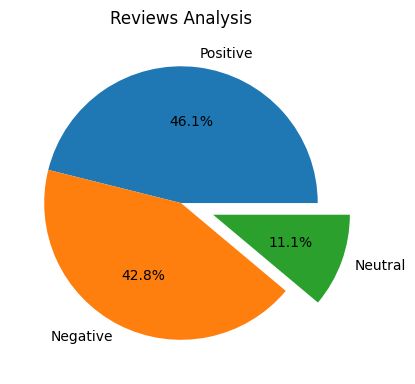

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [18]:
df.to_csv("BA_reviews.csv")

# Wordcloud

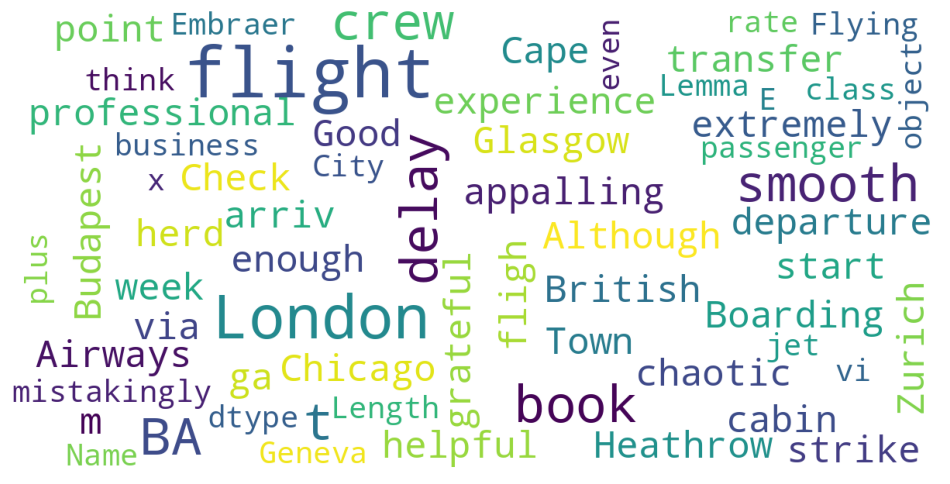

In [19]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

# Predicting customer buying behaviour

get data

In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [21]:
data= '/customer_booking.csv'


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import chardet

with open('/content/drive/MyDrive/Colab Notebooks/ML Projects/British Airways Data Analysis/customer_booking.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [29]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Projects/British Airways Data Analysis/customer_booking.csv', encoding='Windows-1252')

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Exploratory Data Analysis

In [30]:
#checking for datatypes

df.dtypes

,0
num_passengers,int64
sales_channel,object
trip_type,object
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,object
route,object
booking_origin,object
wants_extra_baggage,int64


In [31]:
df.shape

(50000, 14)

In [32]:
#null values

df.isnull().sum()

#there is no null values

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [33]:
df.booking_complete.value_counts()

,count
booking_complete,
0,42522
1,7478


# Mutual Information

In [34]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [35]:
X.dtypes

,0
num_passengers,int64
sales_channel,int64
trip_type,int64
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,int64
route,int64
booking_origin,int64
wants_extra_baggage,int64


In [36]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

,MI Scores
route,0.051485
booking_origin,0.047771
flight_duration,0.018852
wants_extra_baggage,0.008025
wants_in_flight_meals,0.006831
length_of_stay,0.006363
flight_hour,0.004894
purchase_lead,0.004714
wants_preferred_seat,0.003786
num_passengers,0.003428


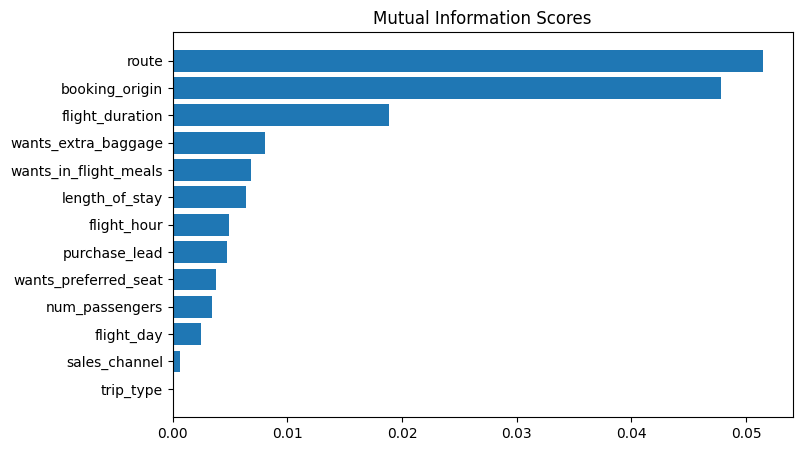

In [37]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

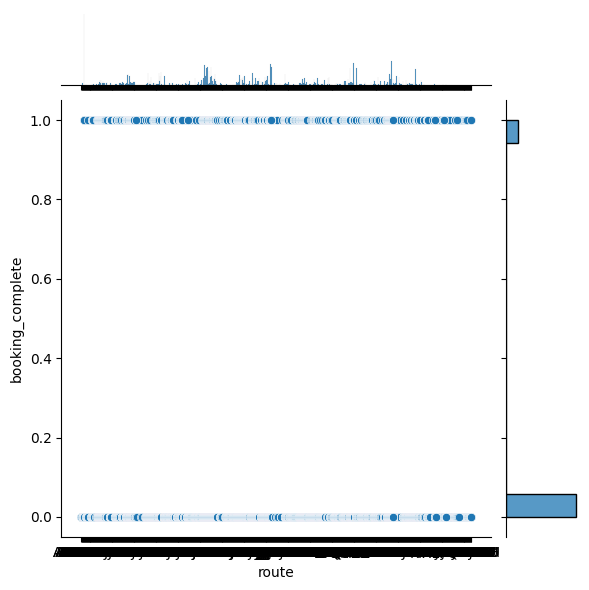

In [39]:
sns.jointplot(data=df, x='route', y='booking_complete')

We can see that the top 5 features which are dependant with booking_complete feature are:

1.   route
2.   booking_origin
3.   flight_duration          
4.   wants_extra_baggage      
5.   length_of_stay

In [40]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [41]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

# Model 1 : Random forest classifier with top 6 features

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.36
AUC score:  0.5657818407546988


# Model 2 : Random forest classifier with all features

In [43]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.76
AUC score:  0.5479604084813514


# Model 3 : XGB classifier with top 6 features

In [44]:
from xgboost import XGBClassifier

X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.72
AUC score:  0.5189398567740671


# Model 4 : XGB classifier with all features

In [45]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.98
AUC score:  0.5424676175552812


Finalizing random forest model with all features as final model, as it has good accuracy and higher auc score compared to other models

Validating with test data set

In [46]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  85.09
AUC score:  0.5577796717361984
